## Portfolio assignment week 6.1

### Decision Trees and Naive bayes

The scikit-learn library provides different parameters for decision trees and naive bayes.

Based on the last code example in the accompanying notebook, add several new models to the classifiers variable. These models should have different parameters. For instance, create a new decision tree with a max depth of 1. Another possibility is to add different datasets or add noise.

Try to understand why some models behave differently than others. Give arguments what influences model performance and why.

### decision trees

In [ ]:
import pandas as pd

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [ ]:
iris = load_iris()
X, y = iris.data, iris.target

# this is for demonstration, always split for generalizability.
dt = tree.DecisionTreeClassifier()
dt.fit(X, y)

DecisionTreeClassifier()

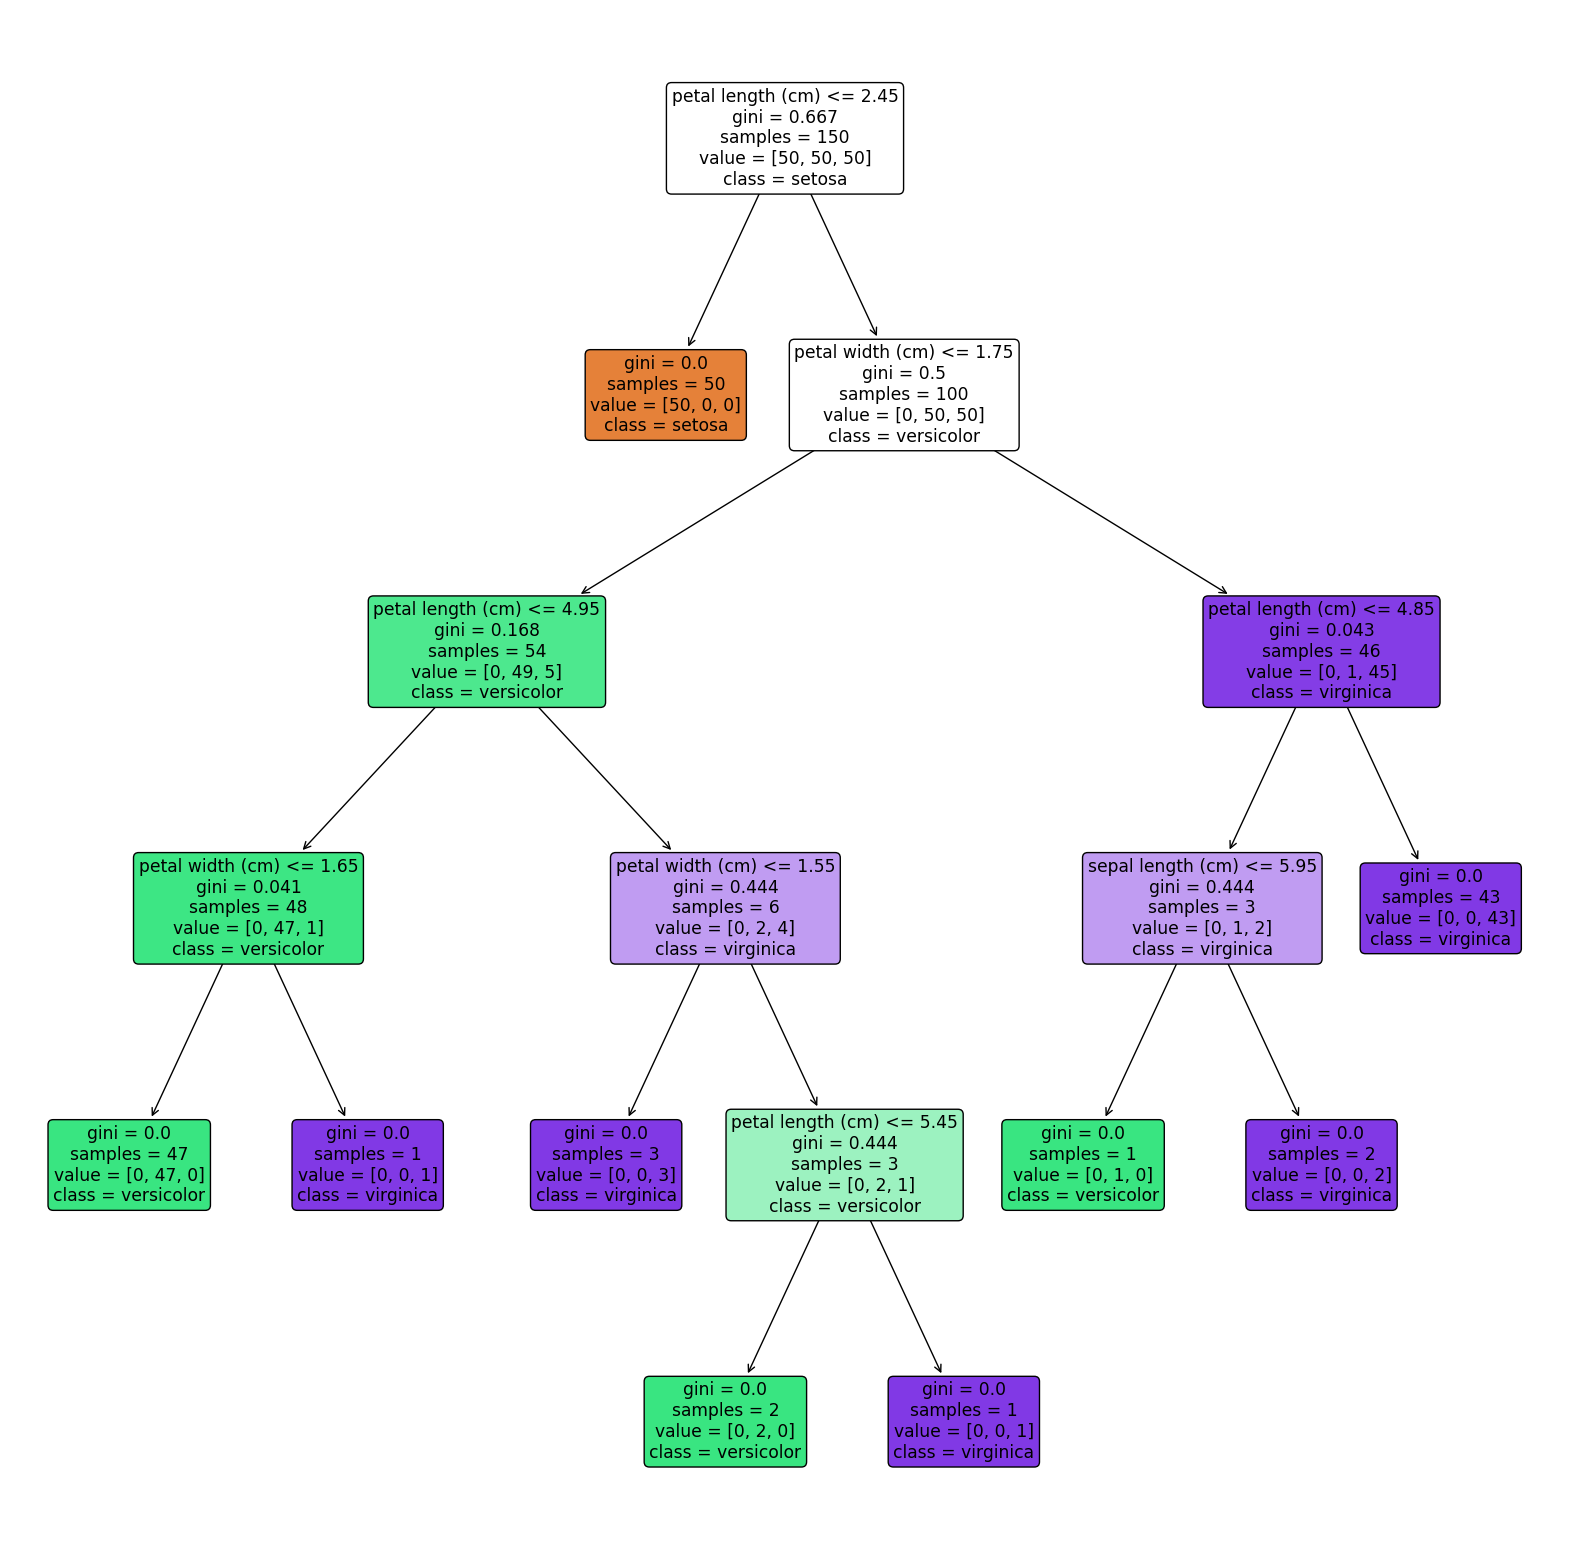

In [ ]:
plt.figure(figsize=(20, 20))
tree.plot_tree(
    dt, 
    feature_names=iris.feature_names, 
    class_names=iris.target_names,
    filled=True,
    rounded=True,
)
plt.show()

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.datasets import make_moons, make_circles
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
datasets = [make_moons(), make_circles()]
names = [ 'Naive Bayes','Decision Tree','SVM','RandomForest','Logistic Regression']
classifiers = [tree.DecisionTreeClassifier(), GaussianNB(),LogisticRegression(random_state=0),SVC(gamma='auto'),RandomForestClassifier(max_depth=1)]

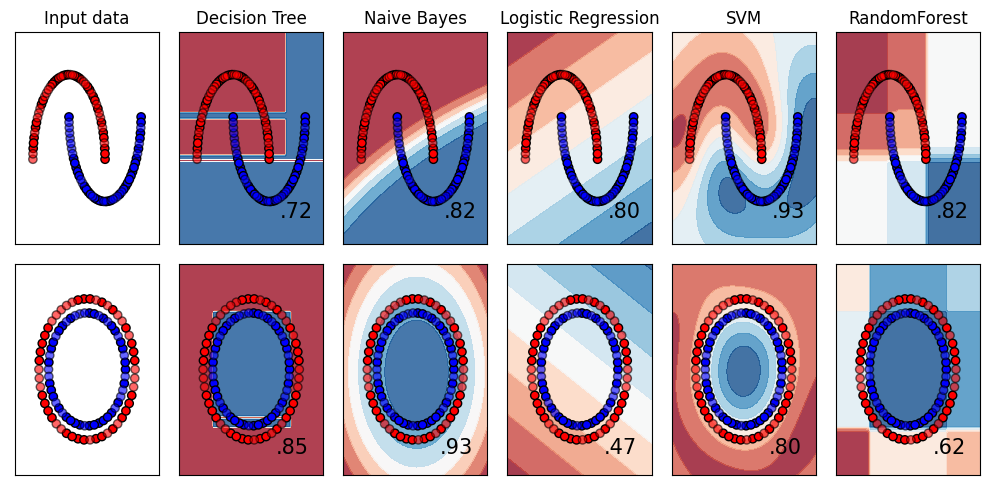

In [ ]:
figure = plt.figure(figsize=(10, 5))

i = 1

# iterate over datasets
for ds_count, ds in enumerate(datasets):
    X, y = ds
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=0
    )
    
    # determining min point and max point and add margin
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # plot dataset
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    
    # plot original
    if ds_count == 0:
        ax.set_title('Input data')
        
    # plot training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    
    # plot testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        
        # make pipeline to make it easier
        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )
        
        # plot training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # plot testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        
        if ds_count == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1
        
plt.tight_layout()
plt.show()

SVMs offer several advantages over other models, making them a preferred choice in certain scenarios. Firstly, SVMs have the capability to capture complex decision boundaries by utilizing diverse kernel functions such as polynomial or radial basis function (RBF) kernels. This flexibility allows SVMs to effectively model non-linear relationships in the data, enabling more accurate classification.

Moreover, SVMs demonstrate robustness to noisy data. They are less susceptible to outliers and can handle noisy samples without significantly compromising their performance. This characteristic proves valuable when dealing with datasets that contain noisy or imperfect data, as SVMs can maintain reliable performance even in the presence of such challenges.

Furthermore, SVMs excel in high-dimensional spaces. Unlike decision trees, which may struggle with overfitting or becoming overly complex in high-dimensional settings, SVMs remain capable of providing accurate results. They can effectively separate data points in spaces with a large number of dimensions, making them well-suited for applications involving extensive feature sets or intricate data structures.

In summary, SVMs offer the advantages of capturing non-linear boundaries using various kernel functions, robustness to noisy data, and suitability for high-dimensional spaces. These factors contribute to their ability to outperform decision trees in specific cases, providing a valuable tool for diverse machine learning tasks.

### Why some models exhibit differing behaviors:

#### Decision Trees:
The behavior of decision trees is notably influenced by their depth parameter. A decision tree with a max_depth of 1, known as a "stump," can only make decisions based on one or a combination of two features. This simplicity can lead to underfitting, where the model lacks the complexity to capture intricate data patterns. Conversely, a deep decision tree might lead to overfitting, capturing noise and hindering generalization to new data. In the provided datasets, a depth of 1 is too simplistic, and even a depth of 2 still struggles to adequately classify the data.

#### Naive Bayes:
In Gaussian Naive Bayes, the var_smoothing parameter contributes a fraction of the largest variance among all features. It's added to variances for stability during calculations. Higher var_smoothing values produce smoother likelihood distributions, reducing overfitting to specific feature values—particularly useful in data with numerous features and a small sample size. However, excessive var_smoothing might lead to underfitting due to excessive smoothing of likelihood distributions.

Within the code, the first Naive Bayes classifier employs var_smoothing=1e-9, while the second utilizes var_smoothing=1e-3. This implies that the second classifier applies more substantial smoothing to feature variances than the first. Despite this difference, the provided datasets don't exhibit a significant distinction between the two classifiers.

In summary, the behavior differences between models arise from their parameter settings. Decision trees' depth affects their complexity and susceptibility to overfitting/underfitting, while Naive Bayes' var_smoothing determines the balance between fitting the data and avoiding overfitting. However, in the given datasets, these parameter changes might not produce substantial divergence in model performance.